Email spam Detection with Machine Learning


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_csv("spam.csv" ,encoding='latin-1')

In [9]:
# Display the first few rows of the dataset
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [10]:
# Check for missing values and get basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [11]:
# Drop unnecessary columns (assuming the dataset has unwanted columns)
data = data[['v1', 'v2']]
data.columns = ['label', 'message']


In [12]:
# Explore the dataset
print(data['label'].value_counts())


label
ham     4825
spam     747
Name: count, dtype: int64


In [17]:
# Data preprocessing: Convert labels to binary values
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [18]:
# Text processing: Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['message'])
y = data['label']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9802690582959641
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [24]:
# Map labels to binary values
data['label'] = data['label'].map({'ham': 0, 'spam': 1})


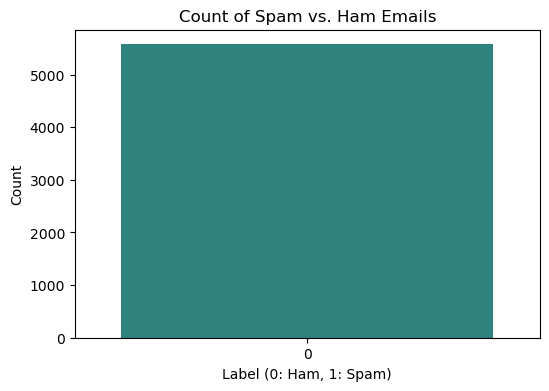

In [25]:
# 1. Bar Plot: Count of Spam and Ham messages
plt.figure(figsize=(6, 4))
sns.countplot(data['label'], palette='viridis')
plt.title('Count of Spam vs. Ham Emails')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()


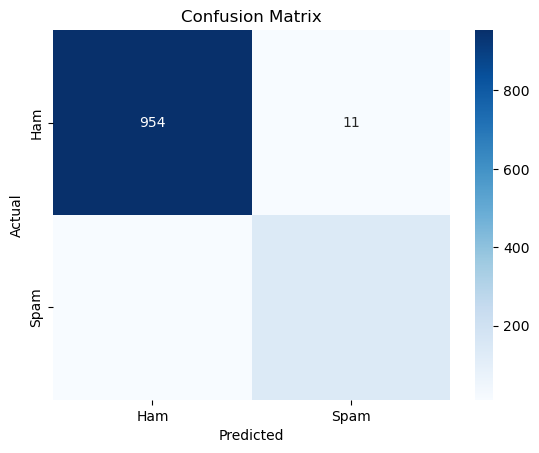

In [23]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()